In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import numpy as np
import tensorflow as tf
import re
import os

subs = np.linspace(0.0, 0.9, 4)
colors = [cmap.viridis(x) for x in subs]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

In [144]:
def get_scalar_events(filename, tag):
    """Gets a list of numbers out of an events file by going through all summaries and looking
    for a specific tag"""
    results = []
    for event in tf.train.summary_iterator(filename):
        for val in event.summary.value:
            if val.tag == tag:
                results.append(val.simple_value)
    return results

In [145]:
def get_task(task, root='../sequential_classifiers/addition'):
    """Gets a bunch of nested dicts with all the data for all cells for a given task.
    `task` should be a string containing the sequence length"""
    cells = [run for run in os.listdir(root) 
             if re.search('\\[{}\\]'.format(task), run)]
    cells = [os.path.join(root, run) for run in cells]
    all_data = {}
    for run_dir in cells:
        # here we assume there is only one file in the run directories
        events_file = [os.path.join(run_dir, fname)
                       for fname in os.listdir(run_dir)
                       if fname.startswith('event')]
        print(events_file)
        if events_file:
            events_file = events_file[0]
        else:
            print('Nothing in {}'.format(run_dir))
            continue
        run_losses = get_scalar_events(events_file, 'train mse')
        run_gnorms = get_scalar_events(events_file, 'gradient norm')
        all_data[run_dir] = {'loss': run_losses, 'gnorm': run_gnorms}
    return all_data

def get_cell(run_dir):
    cellname = os.path.basename(run_dir)
    if cellname.startswith('gate'):
        return 'TGU'
    if cellname.startswith('gru'):
        return 'GRU'
    if cellname.startswith('lstm'):
        return 'LSTM'
    return 'IRNN'

In [155]:
def plot_all(data_dict, title=None, tag='loss', step=1):
    plt.figure(figsize=(10,5))
    for label, data in sorted(data_dict.items()):
        whys = data[tag]
        exes = np.arange(len(whys))
        plt.plot(exes[::step], whys[::step], label=get_cell(label))
        plt.plot([0, exes[-1]], [1/6, 1/6], ls='--', color='black', alpha=0.3)
    plt.xlabel('training step (tens)')
    plt.ylabel('mean squared error')
    plt.legend()
    if title:
        plt.title(title)
    plt.ylim((0, 0.6))

['../sequential_classifiers/addition/gate8rank4-relu-[250]-hlr/events.out.tfevents.1474511048.the-craftsman.ecs.vuw.ac.nz']
['../sequential_classifiers/addition/gru8-[250]-hlr/events.out.tfevents.1474510815.the-craftsman.ecs.vuw.ac.nz']
['../sequential_classifiers/addition/irnn8-[250]-llr/events.out.tfevents.1475525836.Pauls-iMac.local']
['../sequential_classifiers/addition/lstm8-[250]-hlr/events.out.tfevents.1475182709.Pauls-iMac.local']


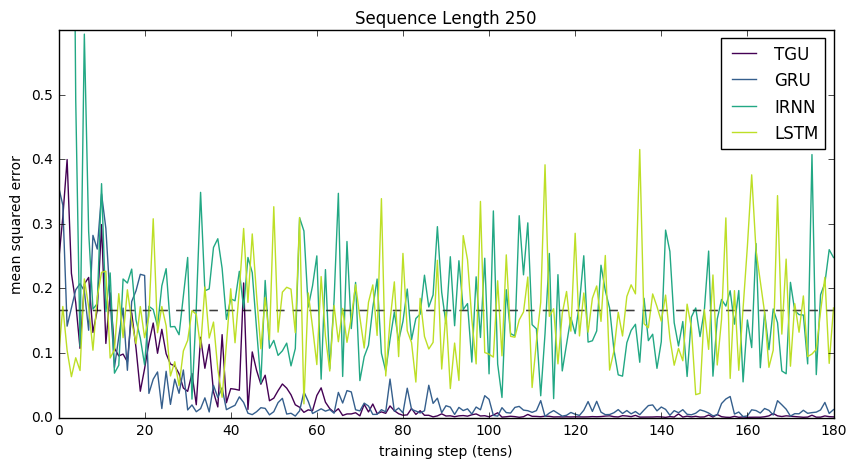

In [156]:
data = get_task('250')
plot_all(data, 'Sequence Length 250')

['../sequential_classifiers/addition/gate8rank4-relu-[500]-hlr/events.out.tfevents.1474511186.the-craftsman.ecs.vuw.ac.nz']
['../sequential_classifiers/addition/gru8-[500]-hlr/events.out.tfevents.1474510494.the-craftsman.ecs.vuw.ac.nz']
['../sequential_classifiers/addition/irnn8-[500]-hlr/events.out.tfevents.1475191096.Pauls-iMac.local']
['../sequential_classifiers/addition/lstm8-[500]-hlr/events.out.tfevents.1475184979.Pauls-iMac.local']


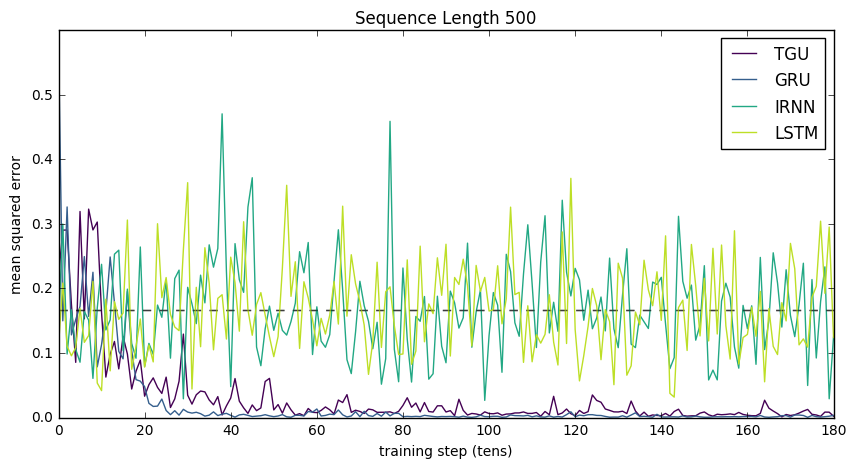

In [157]:
data = get_task('500')
plot_all(data, 'Sequence Length 500')

['../sequential_classifiers/addition/gate8rank4-relu-[750]-hlr/events.out.tfevents.1475178222.Pauls-iMac.local']
['../sequential_classifiers/addition/gru8-[750]-hlr/events.out.tfevents.1474510034.the-craftsman.ecs.vuw.ac.nz']
['../sequential_classifiers/addition/irnn8-[750]-hlr/events.out.tfevents.1475191397.Pauls-iMac.local']
['../sequential_classifiers/addition/lstm8-[750]-hlr/events.out.tfevents.1475784452.Pauls-iMac.local']


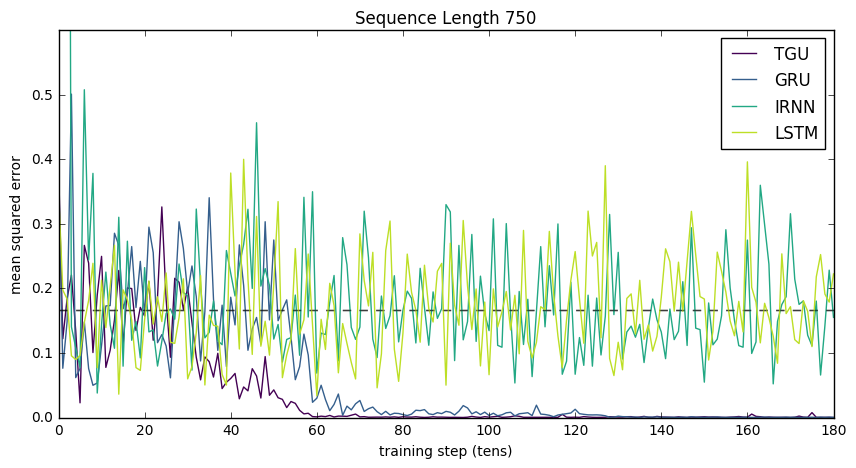

In [158]:
data = get_task('750')
plot_all(data, 'Sequence Length 750')

# now the big boys on the serious sequences
not so many of these so maybe all at once?


In [189]:

def plot_many(*pairs, title=None, tag='loss', step=1):
    plt.figure(figsize=(10,5))
    # we want all of the same cell to have similar colours
    all_results =[]
    for data_dict, sl in pairs:
        for label, data in data_dict.items():
            all_results.append((get_cell(label), data, sl))
            
    for label, data, sl in sorted(all_results, key=lambda x: (x[0], -x[2]), reverse=True):
            whys = data[tag]
            exes = np.arange(len(whys))
            label = '{} ({})'.format(label, sl)
            plt.plot(exes[::step], whys[::step], label=label)
    plt.plot([0, exes[-1]], [1/6, 1/6], ls='--', color='black', alpha=0.3)
    plt.xlabel('training step (tens)')
    plt.ylabel('mean squared error')
    plt.legend(title='cell (sequence length)')
    if title:
        plt.title(title)
    plt.ylim((0, 0.6))

['../sequential_classifiers/addition/gate8rank4-relu-[1000]-hlr/events.out.tfevents.1475175701.Pauls-iMac.local']
['../sequential_classifiers/addition/gru8-[1000]-hlr/events.out.tfevents.1475180718.Pauls-iMac.local']
['../sequential_classifiers/addition/gate8rank4-relu-[5000]-hlr/events.out.tfevents.1475527374.Pauls-iMac.local']
['../sequential_classifiers/addition/gru8-[5000]-hlr/events.out.tfevents.1475785342.Pauls-iMac.local']
['../sequential_classifiers/addition/gate32rank16-relu-[10000]-hlr/events.out.tfevents.1475578794.Pauls-iMac.local']
['../sequential_classifiers/addition/gru32-[10000]-hlr/events.out.tfevents.1475609593.Pauls-iMac.local']


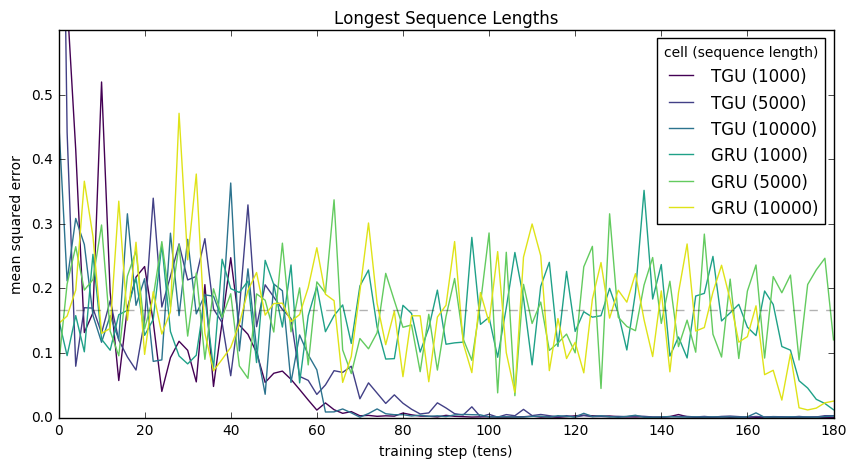

In [190]:
# will need a bigger cmap (have six)
subs = np.linspace(0.0, 0.95, 6)
colors = [cmap.viridis(x) for x in subs]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

ones = get_task('1000')
fives = get_task('5000')
tens = get_task('10000')
plot_many((ones, 1000), (fives, 5000), (tens, 10000), title='Longest Sequence Lengths', step=2)